/var/folders/0j/p23_xktd53bcdvk7xn2jnpy40000gp/T/ipykernel_19157/1973126845.py:38: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[df_2_decimals['distancia_minima'], df_3_decimals['distancia_minima']], palette=['blue', 'red'])
/var/folders/0j/p23_xktd53bcdvk7xn2jnpy40000gp/T/ipykernel_19157/1973126845.py:44: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[df_2_decimals['distancia_haversine'], df_3_decimals['distancia_haversine']], palette=['blue', 'red'])


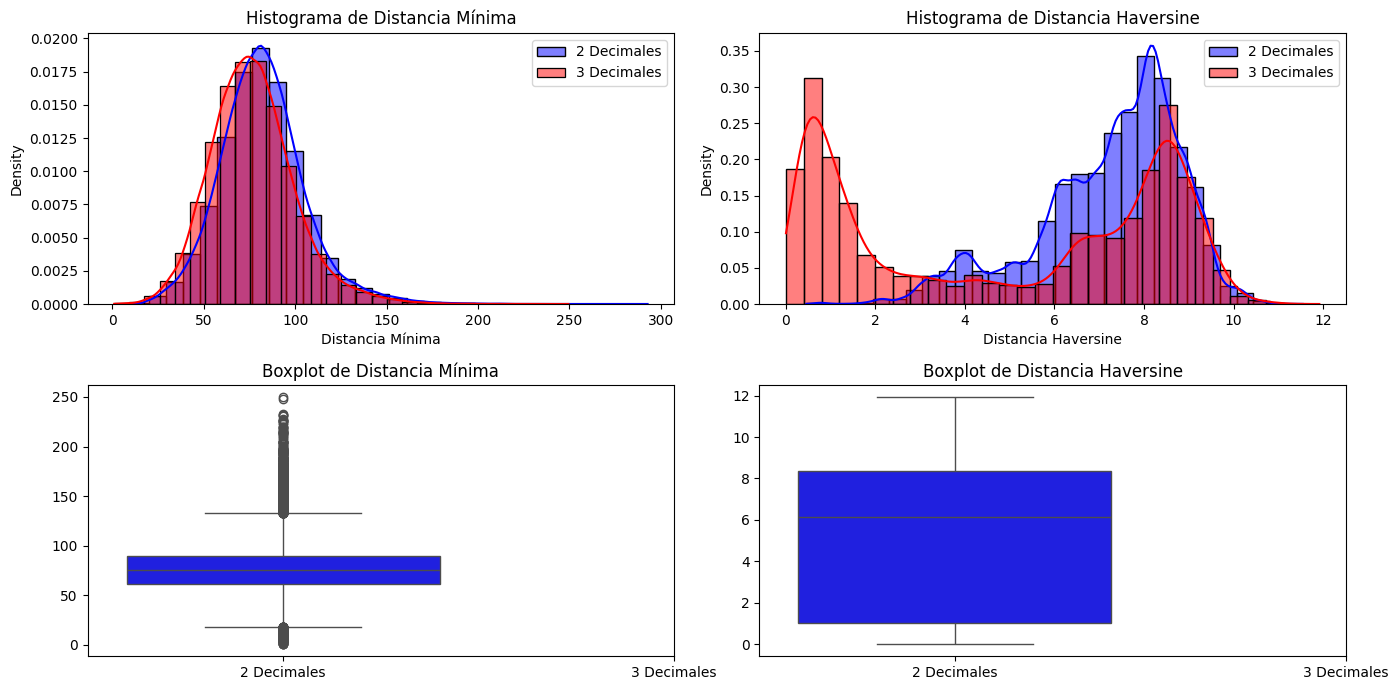

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel, wilcoxon

# Cargar los datasets de 2 y 3 decimales
file_path_2_decimals = 'resultados_2decimales.csv'
file_path_3_decimals = 'resultados_3decimales.csv'

df_2_decimals = pd.read_csv(file_path_2_decimals)
df_3_decimals = pd.read_csv(file_path_3_decimals)

# Asegurarse de que los datasets tienen las mismas dimensiones y están alineados
if df_2_decimals.shape != df_3_decimals.shape:
    raise ValueError("Los datasets no tienen las mismas dimensiones.")

# Comparar las distancias de ambos datasets
plt.figure(figsize=(14, 7))

# Histograma de las distancias mínimas
plt.subplot(2, 2, 1)
sns.histplot(df_2_decimals['distancia_minima'], kde=True, color='blue', label='2 Decimales', stat="density", bins=30)
sns.histplot(df_3_decimals['distancia_minima'], kde=True, color='red', label='3 Decimales', stat="density", bins=30)
plt.title('Histograma de Distancia Mínima')
plt.xlabel('Distancia Mínima')
plt.legend()

# Histograma de las distancias Haversine
plt.subplot(2, 2, 2)
sns.histplot(df_2_decimals['distancia_haversine'], kde=True, color='blue', label='2 Decimales', stat="density", bins=30)
sns.histplot(df_3_decimals['distancia_haversine'], kde=True, color='red', label='3 Decimales', stat="density", bins=30)
plt.title('Histograma de Distancia Haversine')
plt.xlabel('Distancia Haversine')
plt.legend()

# Boxplot de las distancias mínimas
plt.subplot(2, 2, 3)
sns.boxplot(data=[df_2_decimals['distancia_minima'], df_3_decimals['distancia_minima']], palette=['blue', 'red'])
plt.title('Boxplot de Distancia Mínima')
plt.xticks([0, 1], ['2 Decimales', '3 Decimales'])

# Boxplot de las distancias Haversine
plt.subplot(2, 2, 4)
sns.boxplot(data=[df_2_decimals['distancia_haversine'], df_3_decimals['distancia_haversine']], palette=['blue', 'red'])
plt.title('Boxplot de Distancia Haversine')
plt.xticks([0, 1], ['2 Decimales', '3 Decimales'])

plt.tight_layout()
plt.show()


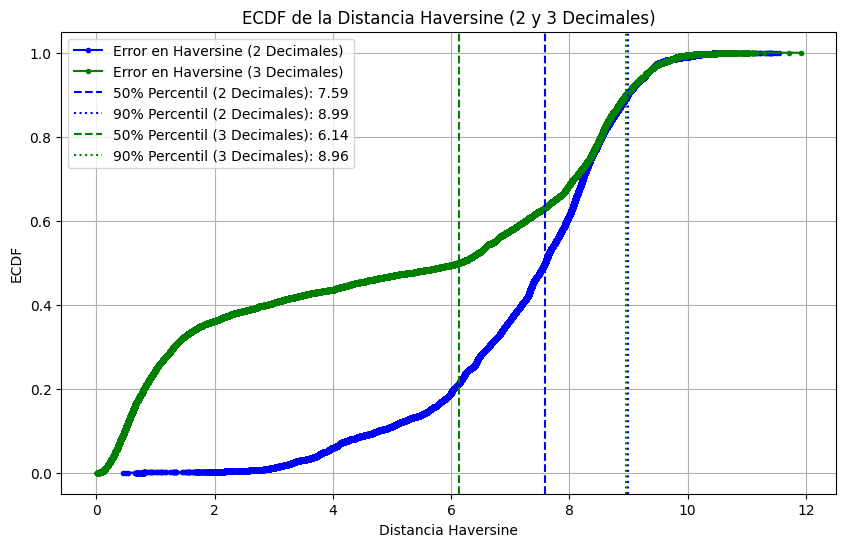

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar los datasets de 2 y 3 decimales
file_path_2_decimals = 'resultados_2decimales.csv'
file_path_3_decimals = 'resultados_3decimales.csv'

df_2_decimals = pd.read_csv(file_path_2_decimals)
df_3_decimals = pd.read_csv(file_path_3_decimals)

# Cálculo de la ECDF y percentiles para la distancia Haversine
dist_haversine_2 = df_2_decimals['distancia_haversine']
dist_haversine_3 = df_3_decimals['distancia_haversine']

# Calcular el percentil 50 y 90 para ambas precisiones
percentile_50_2 = np.percentile(dist_haversine_2, 50)
percentile_90_2 = np.percentile(dist_haversine_2, 90)
percentile_50_3 = np.percentile(dist_haversine_3, 50)
percentile_90_3 = np.percentile(dist_haversine_3, 90)

# Calcular ECDF
ecdf_2 = np.sort(dist_haversine_2)
ecdf_y_2 = np.arange(1, len(ecdf_2) + 1) / len(ecdf_2)

ecdf_3 = np.sort(dist_haversine_3)
ecdf_y_3 = np.arange(1, len(ecdf_3) + 1) / len(ecdf_3)

# Graficar ECDF con formato similar a la imagen
plt.figure(figsize=(10, 6))
plt.plot(ecdf_2, ecdf_y_2, marker='.', linestyle='-', color='blue', label='Error en Haversine (2 Decimales)')
plt.plot(ecdf_3, ecdf_y_3, marker='.', linestyle='-', color='green', label='Error en Haversine (3 Decimales)')

# Añadir líneas para los percentiles 50 y 90
plt.axvline(percentile_50_2, color='blue', linestyle='--', label=f'50% Percentil (2 Decimales): {percentile_50_2:.2f}')
plt.axvline(percentile_90_2, color='blue', linestyle=':', label=f'90% Percentil (2 Decimales): {percentile_90_2:.2f}')
plt.axvline(percentile_50_3, color='green', linestyle='--', label=f'50% Percentil (3 Decimales): {percentile_50_3:.2f}')
plt.axvline(percentile_90_3, color='green', linestyle=':', label=f'90% Percentil (3 Decimales): {percentile_90_3:.2f}')

plt.title('ECDF de la Distancia Haversine (2 y 3 Decimales)')
plt.xlabel('Distancia Haversine')
plt.ylabel('ECDF')
plt.legend()
plt.grid(True)
plt.show()


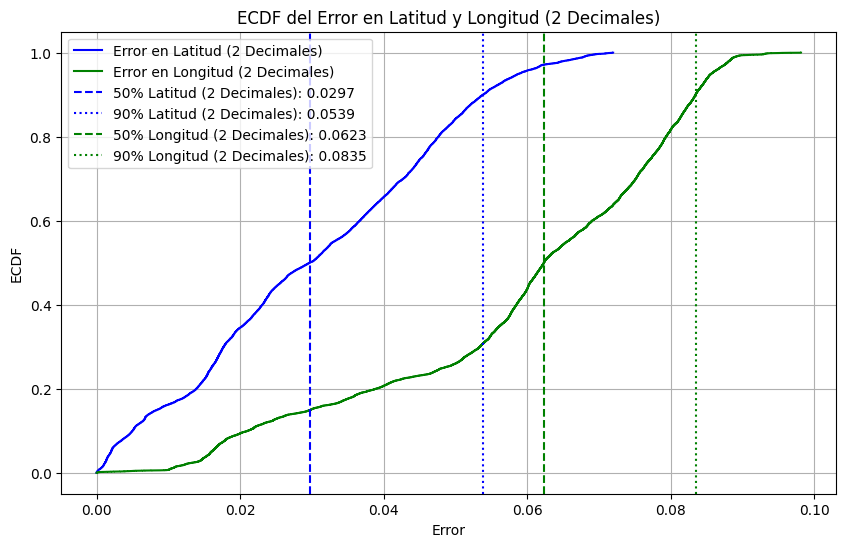

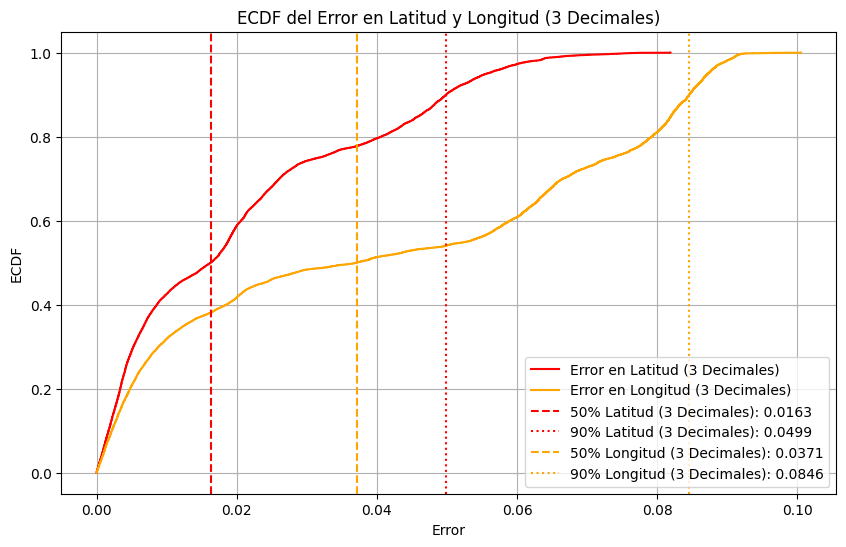

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datasets de 2 y 3 decimales
df_2_decimals = pd.read_csv('resultados_2decimales.csv')
df_3_decimals = pd.read_csv('resultados_3decimales.csv')

# Calcular los errores de latitud y longitud para 2 decimales
df_2_decimals['error_lat'] = np.abs(df_2_decimals['lat_original'] - df_2_decimals['lat_predicha'])
df_2_decimals['error_lon'] = np.abs(df_2_decimals['lon_original'] - df_2_decimals['lon_predicha'])

# Calcular los errores de latitud y longitud para 3 decimales
df_3_decimals['error_lat'] = np.abs(df_3_decimals['lat_original'] - df_3_decimals['lat_predicha'])
df_3_decimals['error_lon'] = np.abs(df_3_decimals['lon_original'] - df_3_decimals['lon_predicha'])

# Calcular los percentiles para 2 decimales
percentiles_2_lat = np.percentile(df_2_decimals['error_lat'], [50, 90])
percentiles_2_lon = np.percentile(df_2_decimals['error_lon'], [50, 90])

# Calcular los percentiles para 3 decimales
percentiles_3_lat = np.percentile(df_3_decimals['error_lat'], [50, 90])
percentiles_3_lon = np.percentile(df_3_decimals['error_lon'], [50, 90])

# Graficar la ECDF para Latitud y Longitud (2 Decimales)
plt.figure(figsize=(10, 6))
sorted_lat_2 = np.sort(df_2_decimals['error_lat'])
y_lat_2 = np.arange(1, len(sorted_lat_2) + 1) / len(sorted_lat_2)
sorted_lon_2 = np.sort(df_2_decimals['error_lon'])
y_lon_2 = np.arange(1, len(sorted_lon_2) + 1) / len(sorted_lon_2)

plt.step(sorted_lat_2, y_lat_2, where="post", label='Error en Latitud (2 Decimales)', color='blue')
plt.step(sorted_lon_2, y_lon_2, where="post", label='Error en Longitud (2 Decimales)', color='green')

# Añadir líneas para los percentiles en 2 decimales
plt.axvline(x=percentiles_2_lat[0], color='blue', linestyle='--', label=f'50% Latitud (2 Decimales): {percentiles_2_lat[0]:.4f}')
plt.axvline(x=percentiles_2_lat[1], color='blue', linestyle=':', label=f'90% Latitud (2 Decimales): {percentiles_2_lat[1]:.4f}')
plt.axvline(x=percentiles_2_lon[0], color='green', linestyle='--', label=f'50% Longitud (2 Decimales): {percentiles_2_lon[0]:.4f}')
plt.axvline(x=percentiles_2_lon[1], color='green', linestyle=':', label=f'90% Longitud (2 Decimales): {percentiles_2_lon[1]:.4f}')

plt.xlabel('Error')
plt.ylabel('ECDF')
plt.title('ECDF del Error en Latitud y Longitud (2 Decimales)')
plt.grid(True)
plt.legend()
plt.show()

# Graficar la ECDF para Latitud y Longitud (3 Decimales)
plt.figure(figsize=(10, 6))
sorted_lat_3 = np.sort(df_3_decimals['error_lat'])
y_lat_3 = np.arange(1, len(sorted_lat_3) + 1) / len(sorted_lat_3)
sorted_lon_3 = np.sort(df_3_decimals['error_lon'])
y_lon_3 = np.arange(1, len(sorted_lon_3) + 1) / len(sorted_lon_3)

plt.step(sorted_lat_3, y_lat_3, where="post", label='Error en Latitud (3 Decimales)', color='red')
plt.step(sorted_lon_3, y_lon_3, where="post", label='Error en Longitud (3 Decimales)', color='orange')

# Añadir líneas para los percentiles en 3 decimales
plt.axvline(x=percentiles_3_lat[0], color='red', linestyle='--', label=f'50% Latitud (3 Decimales): {percentiles_3_lat[0]:.4f}')
plt.axvline(x=percentiles_3_lat[1], color='red', linestyle=':', label=f'90% Latitud (3 Decimales): {percentiles_3_lat[1]:.4f}')
plt.axvline(x=percentiles_3_lon[0], color='orange', linestyle='--', label=f'50% Longitud (3 Decimales): {percentiles_3_lon[0]:.4f}')
plt.axvline(x=percentiles_3_lon[1], color='orange', linestyle=':', label=f'90% Longitud (3 Decimales): {percentiles_3_lon[1]:.4f}')

plt.xlabel('Error')
plt.ylabel('ECDF')
plt.title('ECDF del Error en Latitud y Longitud (3 Decimales)')
plt.grid(True)
plt.legend()
plt.show()



In [28]:
# Imprimir los percentiles para 2 decimales
print(f"Percentiles para Latitud (2 Decimales): 50% = {percentiles_2_lat[0]}, 90% = {percentiles_2_lat[1]}")
print(f"Percentiles para Longitud (2 Decimales): 50% = {percentiles_2_lon[0]}, 90% = {percentiles_2_lon[1]}")

# Imprimir los percentiles para 3 decimales
print(f"Percentiles para Latitud (3 Decimales): 50% = {percentiles_3_lat[0]}, 90% = {percentiles_3_lat[1]}")
print(f"Percentiles para Longitud (3 Decimales): 50% = {percentiles_3_lon[0]}, 90% = {percentiles_3_lon[1]}")

Percentiles para Latitud (2 Decimales): 50% = 0.029719999999997526, 90% = 0.053879999999999484
Percentiles para Longitud (2 Decimales): 50% = 0.06233999999999895, 90% = 0.08346999999999838
Percentiles para Latitud (3 Decimales): 50% = 0.01630000000000109, 90% = 0.04987000000000208
Percentiles para Longitud (3 Decimales): 50% = 0.037120000000001596, 90% = 0.0845600000000033
